## Task 4 : Image Reconstruction using Matrix Factorisation 
### 1. Use the instructor's notebook on matrix factorisation, and solve the following questions. Here, ground truth pixel values are missing for particular regions within the image- you don't have access to them. Pick an image of your liking and reconstruct it using matrix factorization. Choose a suitable value for the rank r. Run Gradient Descent until it converges, plot the reconstructed image alongside the original image. Calculate and report the RMSE and PSNR metrics.

In [7]:
# factorise uses gradient descent to factorise the images
a=factorize(img, 50)    # the task is performed for two different ranks
b=factorize(img, 200)

Converged after 4176 iterations
Converged after 3762 iterations
Converged after 4275 iterations


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.04453393..1.0388072].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.00855677..1.0047108].


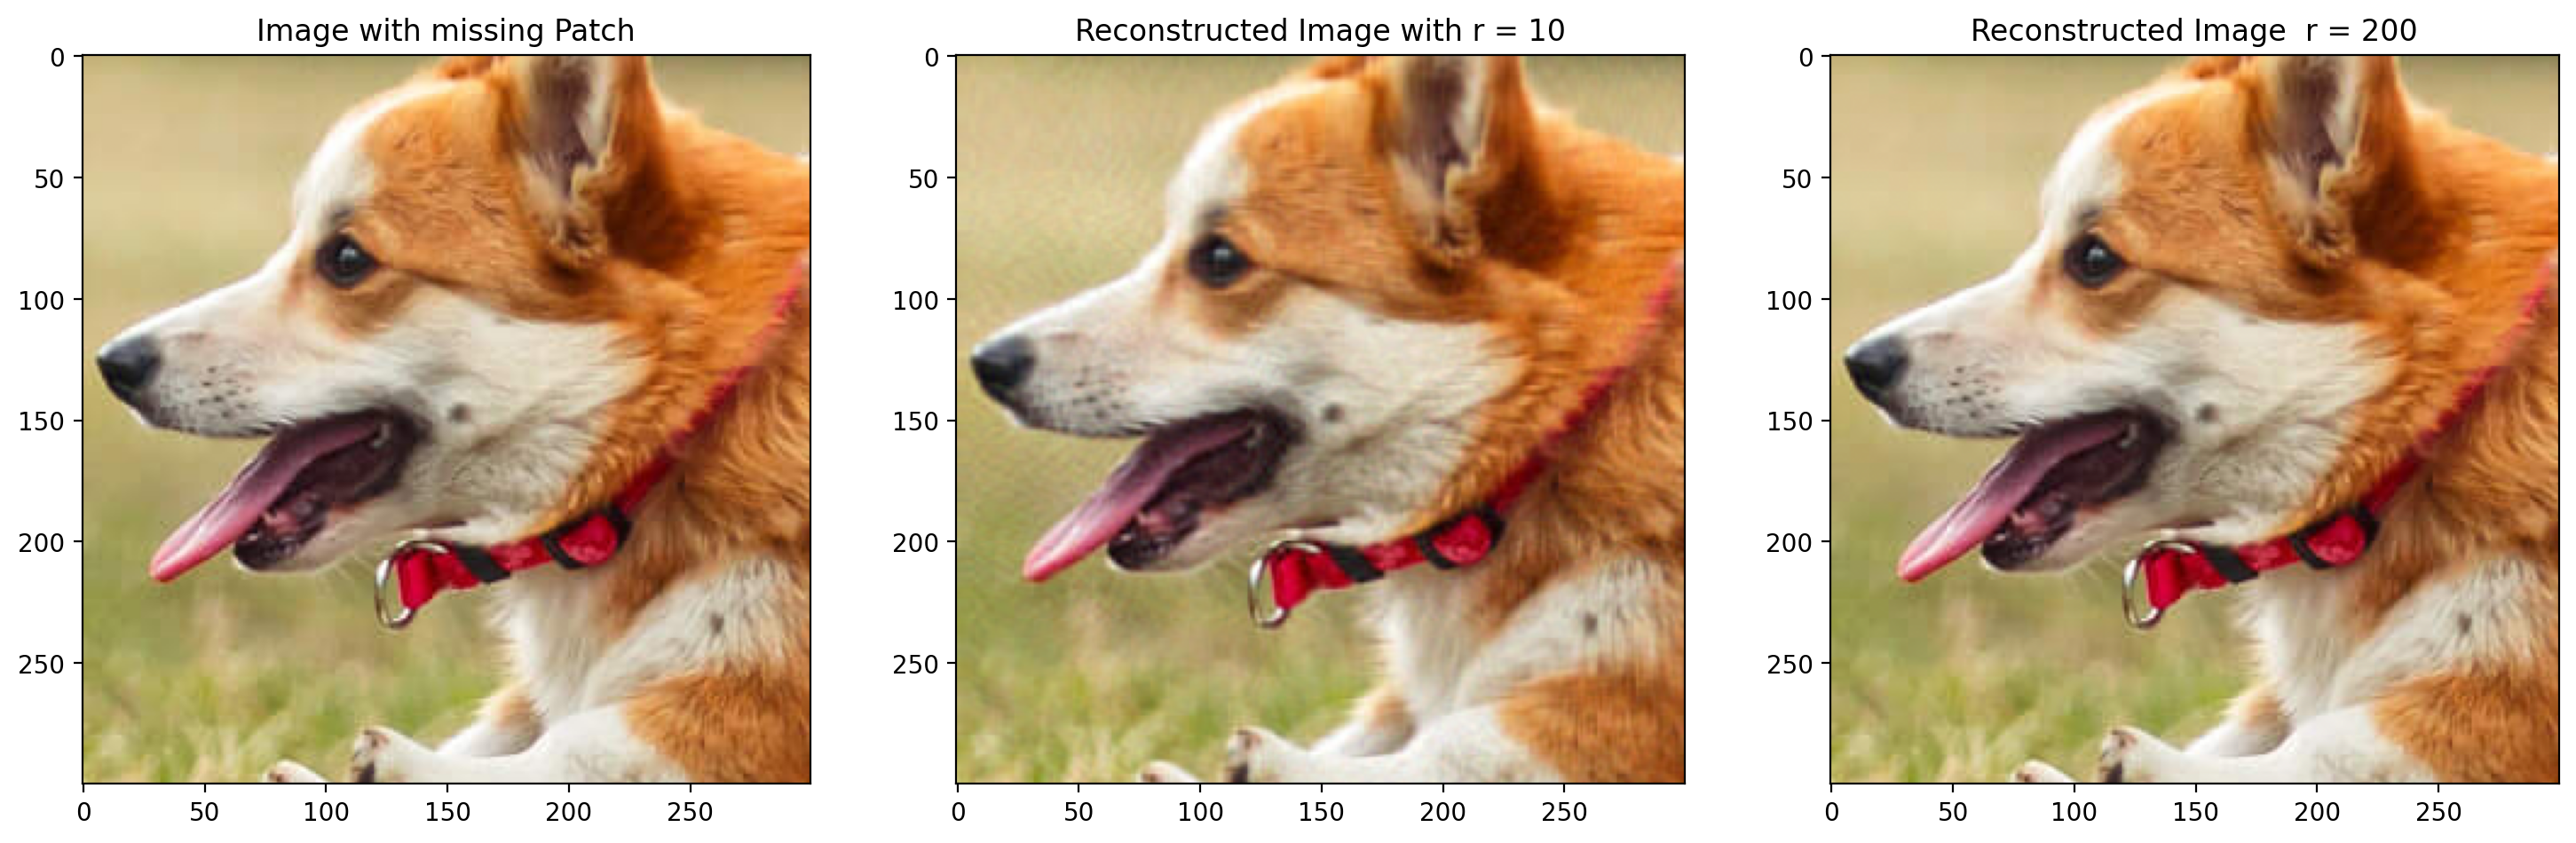

In [71]:

plt.figure(figsize=(18, 6))  # Adjust the size as needed
plt.subplot(1, 3, 1)
plt.imshow((img/255).permute(1, 2, 0).numpy())
plt.title('Image with missing Patch')

plt.subplot(1, 3, 2)
plt.imshow((a/255).permute(1, 2, 0).numpy())
plt.title('Reconstructed Image with r = 10')

plt.subplot(1, 3, 3)
plt.imshow((b/255).detach().permute(1, 2, 0).numpy())
plt.title('Reconstructed Image  r = 200')

plt.show()
plt.close()

In [72]:
def calRMSE_and_PSNR(img1,img2):
    """
    img1: torch.Tensor of shape (num_channels, height, width)
    img2: torch.Tensor of shape (num_channels, height, width)

    return: tuple of float and float
    """
    rmse = torch.sqrt(torch.mean((img1 - img2) ** 2))
    psnr = 20 * torch.log10(1.0 / rmse)
    return rmse.item(), psnr.item()

rmse, psnr = calRMSE_and_PSNR(dog/255, b/255)
print(f" RMSE for sigma = {0.1} ", rmse, f" \nPSNR for sigma = {0.1} ", psnr)

 RMSE for sigma = 0.1  0.0008552441722713411  
PSNR for sigma = 0.1  61.35820007324219


#
#
### 2. Consider a case where 900 pixels (30x30) are randomly missing from an image. Reconstruct the image using matrix factorization, plot the reconstructed image, and calculate the RMSE and PSNR metrics. Next, reconstruct the same image with the missing pixels using Random Fourier Features (RFF) and Linear Regression. Compute the RMSE and PSNR for both methods, and compare the results to see which performs better.


In [7]:
img,_,_ = img_missing_patches(dog,(50,50),30,30)     # a patch of 30X30 is removed from the image and the image is reconstructed using matrix factorisation
a=factorize(img, 50)
b=factorize(img, 200)

Converged after 4176 iterations
Converged after 3762 iterations
Converged after 4275 iterations


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.953431..1.8623935].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.00540435..1.0472603].


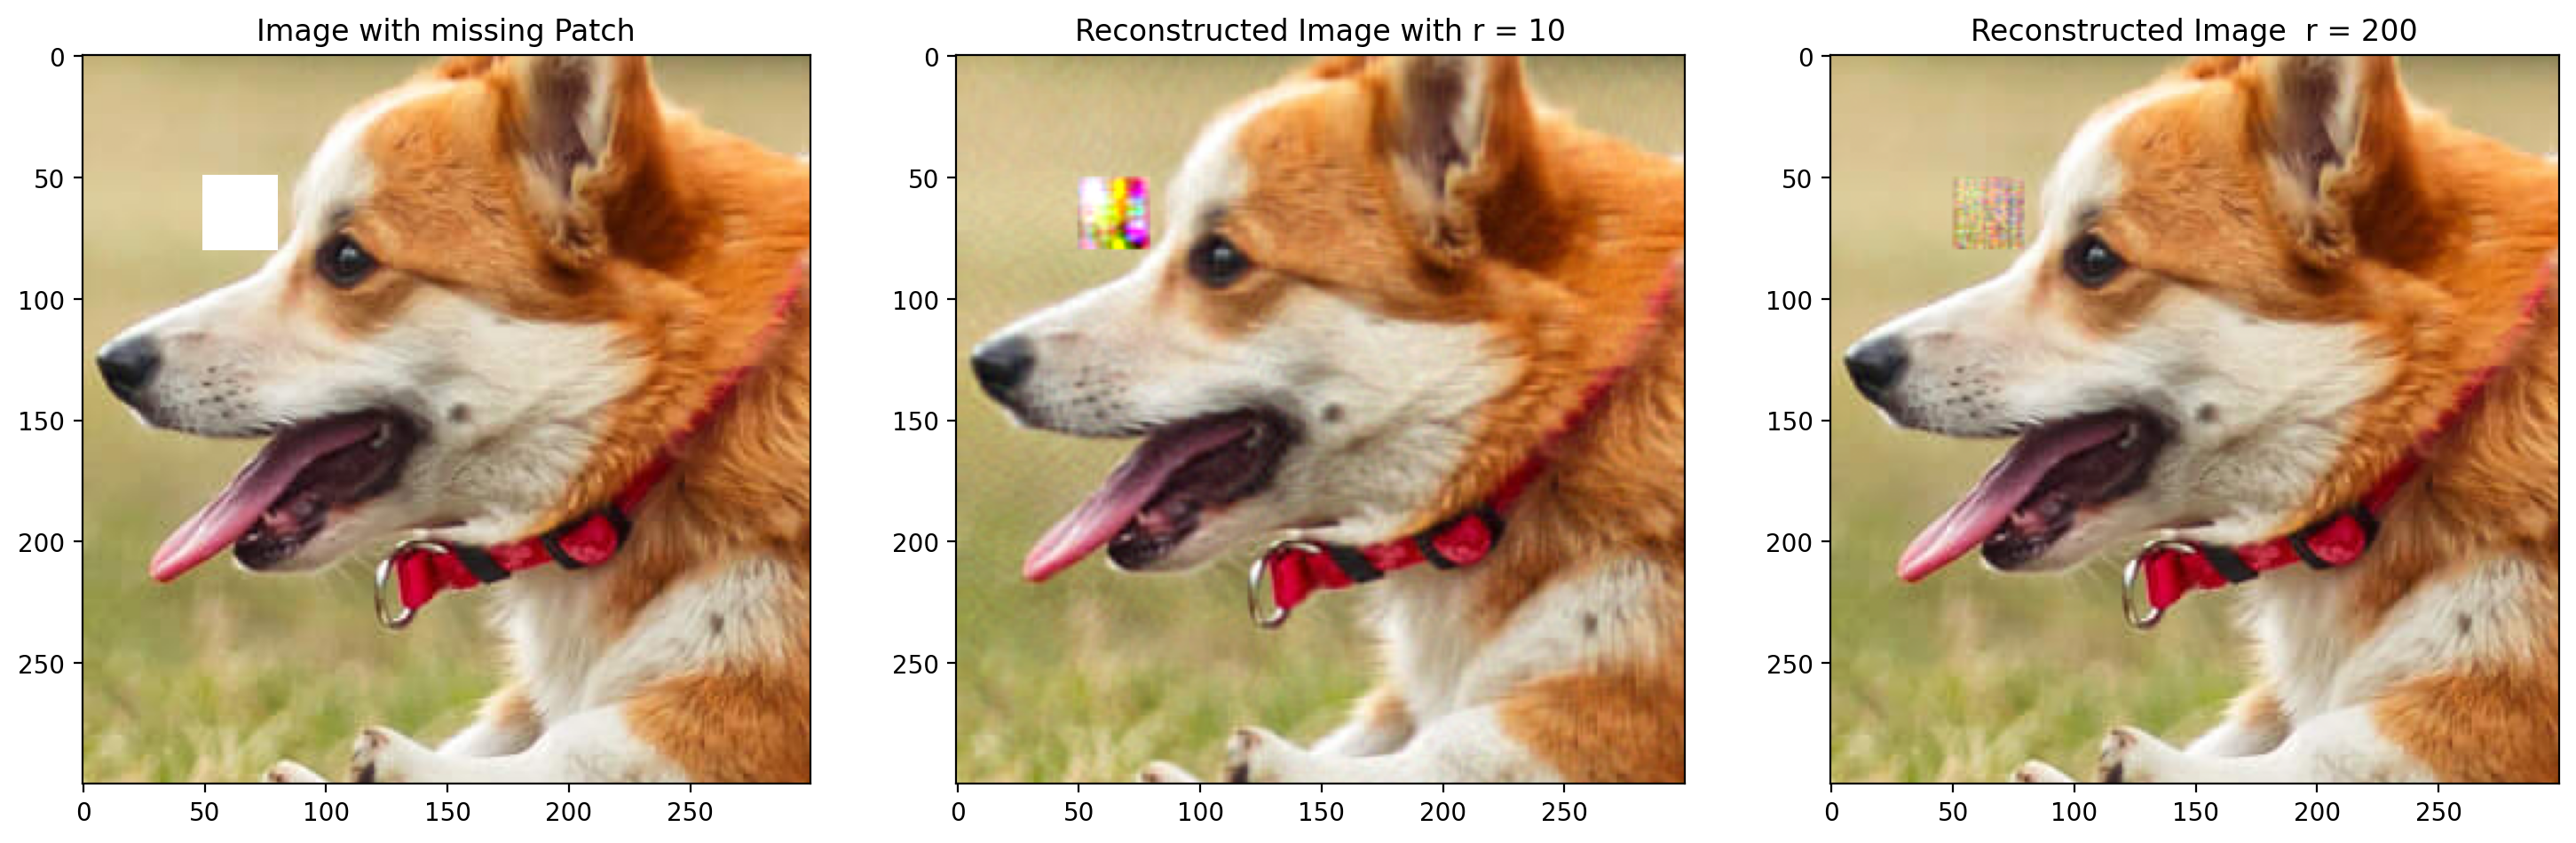

In [8]:
plt.figure(figsize=(18, 6)) 
plt.subplot(1, 3, 1)
plt.imshow((img/255).permute(1, 2, 0).numpy())
plt.title('Image with missing Patch')

plt.subplot(1, 3, 2)
plt.imshow((a/255).permute(1, 2, 0).numpy())
plt.title('Reconstructed Image with r = 10')

plt.subplot(1, 3, 3)
plt.imshow((b/255).detach().permute(1, 2, 0).numpy())
plt.title('Reconstructed Image  r = 200')

plt.show()
plt.close()

In [17]:
def calRMSE_and_PSNR(img1,img2):
    """
    img1: torch.Tensor of shape (num_channels, height, width)
    img2: torch.Tensor of shape (num_channels, height, width)

    return: tuple of float and float
    """
    rmse = torch.sqrt(torch.mean((img1 - img2) ** 2))
    psnr = 20 * torch.log10(1.0 / rmse)
    return rmse.item(), psnr.item()

rmse, psnr = calRMSE_and_PSNR(dog/255, b/255)
print(f" RMSE for sigma = {0.1} ", rmse, f" \nPSNR for sigma = {0.1} ", psnr)

 RMSE for sigma = 0.1  0.010562915354967117  
PSNR for sigma = 0.1  39.524322509765625


In [17]:
def calRMSE_and_PSNR(img1,img2):
    """
    img1: torch.Tensor of shape (num_channels, height, width)
    img2: torch.Tensor of shape (num_channels, height, width)

    return: tuple of float and float
    """
    rmse = torch.sqrt(torch.mean((img1 - img2) ** 2))
    psnr = 20 * torch.log10(1.0 / rmse)
    return rmse.item(), psnr.item()

rmse, psnr = calRMSE_and_PSNR(dog/255, b/255)
print(f" RMSE for sigma = {0.1} ", rmse, f" \nPSNR for sigma = {0.1} ", psnr)

 RMSE for sigma = 0.1  0.010562915354967117  
PSNR for sigma = 0.1  39.524322509765625
